# Final Project: Quantum Dot Eigenstates

In one-dimension, Quantum Dots (QDs) can be effectively viewed as a finite potential square well system.  Therefore, the Schrodinger equation will be solved for the classic finite square well, a problem that has been studied in depth.  Two different codes will be used to solve this system and the resulting eigenstates will be compared.  In the first code, a finite difference method is used to solve the Schrodinger equation.  In the second code, *scipy.integrate.odeint()*, which uses either an Adams or Backwards Differentiation formula (BDF) method. Both of these methods are compared to each other and to the analytical solution at the end.

In [1]:
from pylab import *
from scipy.integrate import simps
#from scipy.optimize import brentq
from SchrodingerSolver_scipy import Finite_Well_Scipy_Solver
from SchrodingerSolver_user import Finite_Well_Solver
from IPython.display import display, Math

plt.rcParams['figure.dpi'] = 125

## Check FD Accuracy

The accuracy of the Finite Difference code is first checked against the BFD code and the analytical solutions.  For this section, simple values for the potential well depth and width are used to make comparing values easier.  The mass is also assumed to be such that $m/\hbar^2 = 0$.

### Define Constants

In [2]:
N = 1000                    # number of points to take

Vo = 20
E = 0.0                     # global variable Energy  needed for Sch.Eq, changed in function "Wave function"
b = 2                       # point outside of well where we need to check if the function diverges
x = linspace(-b, b, N)      # x-axis
en = linspace(0, Vo, 100)  # vector of energies where we look for the stable states
L = 1
m = 1 
hbar = 1 

## Finite Difference (FD) Method

### Initialize FD Finite Well Solver Class

In [3]:
s = Finite_Well_Solver(x, b, L, Vo, en, m, hbar)

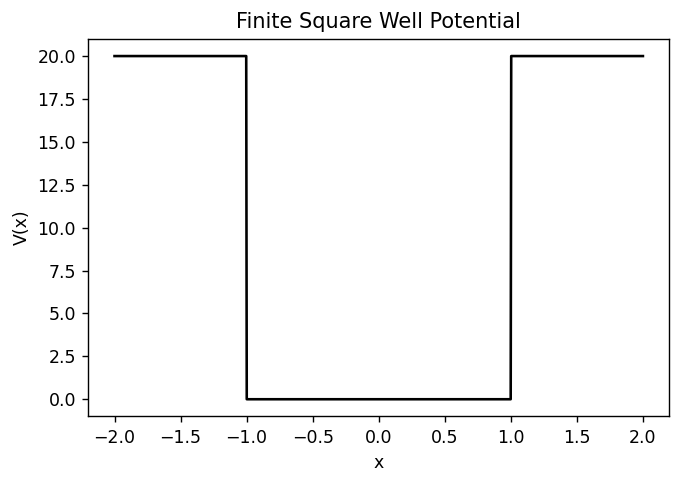

In [4]:
plt.figure(1)
pot = []
for i in x:
    pot.append(s.V_func(i))
plt.plot(s.x,pot,'k-')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Finite Square Well Potential')
plt.show()

### Use FD to get Eigenstates

In [5]:
eigvals, eigfuns = s.finite_diff(4)

### Compare Energies from FD to Energies from Analytical Method

In [6]:
print ("Energies for the bound states are: ")
for i in range(0,len(eigvals)):
    print("%1.6f" %(eigvals[i]));

s.find_analytic_energies(6);

Energies for the bound states are: 
0.916272
3.639914
8.078635
13.983551
Energies from the analytical model are: 
(Symmetrical case)
0.917870
8.092151
19.972583
(Antisymmetrical case)
3.646201
14.002160


/results/qd-final20/SchrodingerSolver_user.py:80: RuntimeWarning: divide by zero encountered in true_divide
  f_sym = lambda z: tan(z)-sqrt((z0/z)**2-1)      # Formula 2.156, symmetrical case
/results/qd-final20/SchrodingerSolver_user.py:81: RuntimeWarning: divide by zero encountered in true_divide
  f_asym = lambda z: -1/tan(z)-sqrt((z0/z)**2-1)  # Formula 2.156, antisymmetrical case


### Check if Wavefunctions are Normalized

In [7]:
for i in range(0,len(eigvals)):
    psi = eigfuns[:,i]
    display(Math(r"$\int |Psi[{}]|^2 = {}$".format(i+1,simps(psi**2))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

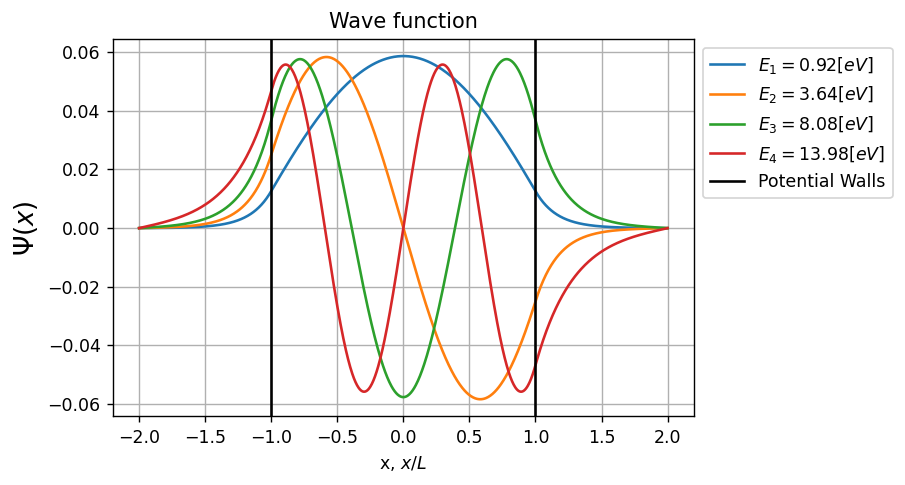

In [8]:
plt.figure(2)

for i in range(0,len(eigvals)):
    psi = eigfuns[:,i]
    plt.plot(x, psi, label="$E_%d = %.2f [eV]$"%(i+1, eigvals[i]))
plt.axvline(x=L,color ='k',label='Potential Walls')
plt.axvline(x=-L,color='k')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Wave function')
plt.xlabel('x, $x/L$')
plt.ylabel('$\Psi(x)$', fontsize = 15)
plt.grid()

## Use Libraries

Here we repeat the previous calculations but instead of using the finite difference method, as above, the function *scipy.integrate.odeint()* was used for integration.

### Initialize Finite Well Solver Class

In [9]:
psi = np.zeros([N,2])       # Wavefunction values and its derivative (psi and psi')
psi0 = array([0,1])         # Wavefunction initial states

In [10]:
s_scip = Finite_Well_Scipy_Solver(x, b, L, Vo, en, m, hbar, psi, psi0)

### Find Energies Corresponding to $\Psi \left( b \right)$

In [11]:
psi_b_s = []    # vector of wave function at x = b for all of the energies in en

for e1 in en:
    psi_b_s.append(s_scip.Wave_function(e1))     # for each energy e1 find the the psi(x) at x = b
E_zeroes_s = s_scip.find_all_zeroes(en, psi_b_s)   # now find the energies where psi(b) = 0 

### Compare Energies from Scipy.Integrate and Analytical Methods

In [12]:
print ("Energies for the bound states are: ")
for E in E_zeroes_s:
    print("%.4f" %E);

E_n = s_scip.find_analytic_energies();

Energies for the bound states are: 
0.9179
3.6462
8.0923
14.0059
Energies from the analytical model are: 
(Symmetrical case)
0.9179
8.0922
19.9726
(Antisymmetrical case)
3.6462
14.0022


/results/qd-final20/SchrodingerSolver_scipy.py:78: RuntimeWarning: divide by zero encountered in true_divide
  f_sym = lambda z: tan(z)-sqrt((z0/z)**2-1)      # Formula 2.138, symmetrical case
/results/qd-final20/SchrodingerSolver_scipy.py:79: RuntimeWarning: divide by zero encountered in true_divide
  f_asym = lambda z: -1/tan(z)-sqrt((z0/z)**2-1)  # Formula 2.138, antisymmetrical case


### Plot Wavefunction at b vs Energy Vector

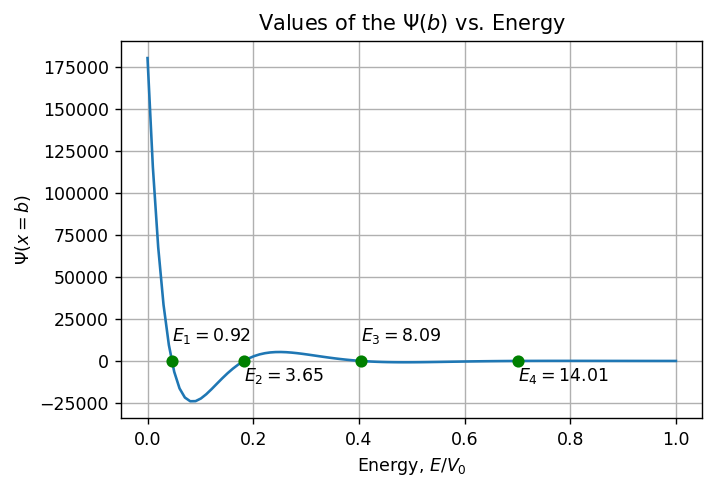

In [13]:
plt.figure(3)
plt.plot(en/Vo,psi_b_s)
plt.title('Values of the $\Psi(b)$ vs. Energy')
plt.xlabel('Energy, $E/V_0$')
plt.ylabel('$\Psi(x = b)$')
i=1
for E in E_zeroes_s:
    plt.plot(E/Vo, [0], 'go')
    plt.annotate("$E_%d = %.2f$"%(i,E), xy = ((E/Vo), 0), xytext=(E/Vo, 12000*(-1)**(i+1)))
    i += 1
plt.grid()

### Plot the Wavefunctions for First 4 Eigenstates

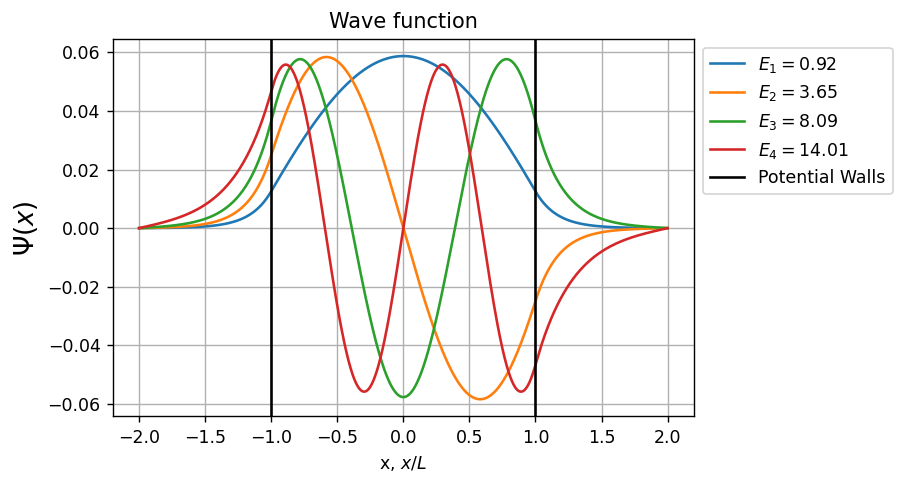

In [14]:
plt.figure(4)
i = 1
for E in E_zeroes_s:
    psi = s_scip.Wave_function_full(E)
    psi = psi[:,0]
    # NORMALIZE
    norm_coef = np.sqrt(simps(psi**2))
    psi = (1/norm_coef)*psi
    plt.plot(x, psi, label="$E_%d = %.2f$"%(i, E))
    i += 1 
plt.axvline(x=L,color ='k',label='Potential Walls')
plt.axvline(x=-L,color='k')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Wave function')
plt.xlabel('x, $x/L$')
plt.ylabel('$\Psi(x)$',fontsize = 15)
plt.grid()

## Compare Results

In [15]:
E_act = [E_n[0][0], E_n[1][0], E_n[0][1], E_n[1][1]]

In [16]:
print("\033[4mE_n\tFinite Diff\tScipy\t\tActual\t\tError (Finite Diff)\tError (Scipy)\033[0m")
for i in range(0,len(E_zeroes_s)):
    error_1 = abs((E_act[i] - eigvals[i])/eigvals[i])
    error_2 = abs((E_act[i] - E_zeroes_s[i])/E_zeroes_s[i])
    print("E_%d \t%1.8f\t%1.8f\t%1.8f\t%1.8f\t\t%1.8f" %(i+1, eigvals[i], E_zeroes_s[i], E_act[i], error_1, error_2));

E_n	Finite Diff	Scipy		Actual		Error (Finite Diff)	Error (Scipy)
E_1 	0.91627163	0.91787260	0.91787048	0.00174495		0.00000231
E_2 	3.63991351	3.64621994	3.64620079	0.00172732		0.00000525
E_3 	8.07863497	8.09233970	8.09215055	0.00167300		0.00002337
E_4 	13.98355098	14.00586075	14.00216028	0.00133080		0.00026421


### Comments

While both methods prove to be accurate integration techniques, the *scipy.integrate.odeint()* function is the more accuracte method of the two.  

## Solve System with QD Values

Now that the finite difference method has been proven to work and be accurate, the eigenstates will be found for a system that more closely resembles an actual QD.  Values for the potential well height and width were used for Gallium Arsenide (GaAs).

In [17]:
N = 1000
Vo = 1.515 #[eV]
L = 5*10**(-9) #[m]
b = 2*L #[m]
x = linspace(-b, b, N)      # x-axis
en = linspace(0, Vo, 100)  # vector of energies where we look for the stable states
m = 0.51099895000*10**6 # [eV/c^2]
hbar = 6.582119569*10**(-16) # Planck constant [eV*s]

In [18]:
s = Finite_Well_Solver(x, b, L, Vo, en, m, hbar)

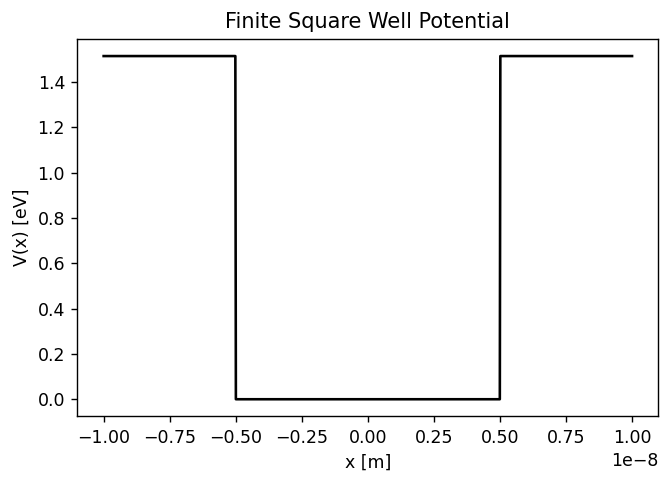

In [19]:
plt.figure(1)
pot = []
for i in x:
    pot.append(s.V_func(i))
plt.plot(s.x,pot,'k-')
plt.xlabel('x [m]')
plt.ylabel('V(x) [eV]')
plt.title('Finite Square Well Potential')
plt.show()

In [20]:
eigvals, eigfuns = s.finite_diff(6)

In [21]:
print ("Energies for the bound states are: ")
for i in range(0,len(eigvals)):
    print("%1.6e [eV]" %(eigvals[i]));

Energies for the bound states are: 
4.158870e-20 [eV]
1.663532e-19 [eV]
3.742885e-19 [eV]
6.653866e-19 [eV]
1.039636e-18 [eV]
1.497022e-18 [eV]


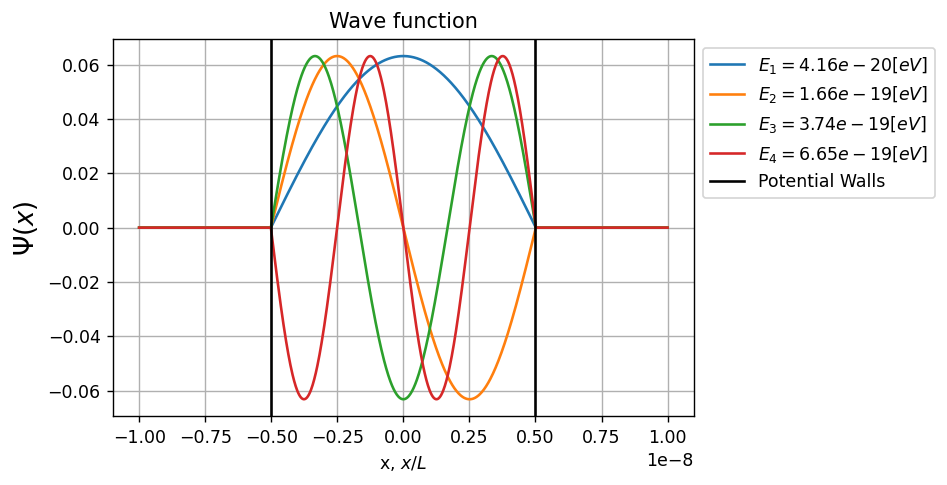

In [31]:
plt.figure(2)

for i in range(0,4):
    psi = eigfuns[:,i]
    plt.plot(x, psi, label="$E_%d = %.2e [eV]$"%(i+1, eigvals[i]))
plt.axvline(x=L,color ='k',label='Potential Walls')
plt.axvline(x=-L,color='k')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Wave function')
plt.xlabel('x, $x/L$')
plt.ylabel('$\Psi(x)$', fontsize = 15)
plt.grid()

The wavefunctions shown above do not extend beyond the well edges.  This means that for GaAs, energy values determined by the finite difference method can be checked for relative accuracy using the infinite potential well equation,

$$ E_n = \frac{\pi^2 \hbar^2 n^2}{2 m L^2}$$

In [23]:
import math
def Inf_En(hb, n, m_e, L_e):
    En = ((math.pi**2)*(hb**2)*(n**2))/(2*m_e*(L_e**2))
    return En

In [26]:
IE = []
for i in range(1,5):
    IE.append(Inf_En(hbar, i, m, L))
print(IE)

[1.6735599257820252e-19, 6.694239703128101e-19, 1.5062039332038227e-18, 2.6776958812512403e-18]


In [35]:
print("E_n\tFD\t\tInfinite Potential Well")
print("E_%d \t%1.8e\t%1.8e" %(1,eigvals[1],IE[0]));
print("E_%d \t%1.8e\t%1.8e" %(1,eigvals[3],IE[1]));
print("E_%d \t%1.8e\t%1.8e" %(1,eigvals[5],IE[2]));


E_n	FD		Infinite Potential Well
E_1 	1.66353181e-19	1.67355993e-19
E_1 	6.65386558e-19	6.69423970e-19
E_1 	1.49702164e-18	1.50620393e-18


Values found from the FD method closely match those calculated using the infinite potential square well energy equation.